# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/week3/fraudTest.csv/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [5]:
df_select = df[["trans_date_trans_time", "is_fraud", "category", "amt", "city_pop"]]

In [6]:
df_select.columns

Index(['trans_date_trans_time', 'is_fraud', 'category', 'amt', 'city_pop'], dtype='object')

# 3.) Create a unique variable out of trans_date.

In [7]:
type(df_select["trans_date_trans_time"][0])

str

In [8]:
df_select["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

<ipython-input-8-db2184404d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])


In [9]:
df_select["trans_date_trans_time"][0]

Timestamp('2020-06-21 12:14:25')

In [10]:
df_select["trans_date_trans_time"]

0        2020-06-21 12:14:25
1        2020-06-21 12:14:33
2        2020-06-21 12:14:53
3        2020-06-21 12:15:15
4        2020-06-21 12:15:17
                 ...        
555714   2020-12-31 23:59:07
555715   2020-12-31 23:59:09
555716   2020-12-31 23:59:15
555717   2020-12-31 23:59:24
555718   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

In [11]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-11-fa4370ef92e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [12]:
x = pd.get_dummies(df_select,["category"]).drop(["trans_date_trans_time"], axis = 1)
y = df["is_fraud"]

In [13]:
x.head()

,is_fraud,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 4.) Oversample the data (this will be your training data).

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)

# 5.) Train a Logistic regression.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)
# Create an instance of the logistic regression model
clf = LogisticRegression()
# Fit the model to the training data
model = clf.fit(x_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(x_test)
# Evaluate the model using metrics like accuracy, precision, recall, etc
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.7844510680576254
Precision: 0.8028454308946211
Recall: 0.7546335565140495


# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [20]:
from sklearn.metrics import confusion_matrix
# Make predictions with predict_proba
y_pred_proba = clf.predict_proba(x_test)[:, 1]
# Set the threshold for false negative percentage
threshold_list = [(i+1)/1000 for i in range(1000)]
false_negative_rate_list = []
for threshold in threshold_list:
  y_pred = (y_pred_proba > threshold).astype(int)
# Calculate confusion matrix
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Calculate false negative rate
  false_negative_rate = fn / (fn + tp)
# Filter False Negetive Rate that is to large
  if abs(false_negative_rate - 0.05) > 0.01:
    pass
  else:
    print("False Negative Rate: ", false_negative_rate)
    print("Threshhold: ", threshold)
  false_negative_rate_list.append((threshold, false_negative_rate))


False Negative Rate:  0.04004620021295411
Threshhold:  0.187
False Negative Rate:  0.041408745555936544
Threshhold:  0.188
False Negative Rate:  0.041408745555936544
Threshhold:  0.189
False Negative Rate:  0.041760661240547906
Threshhold:  0.19
False Negative Rate:  0.041760661240547906
Threshhold:  0.191
False Negative Rate:  0.04201331865514068
Threshhold:  0.192
False Negative Rate:  0.042509610005233615
Threshhold:  0.193
False Negative Rate:  0.04335781703993792
Threshhold:  0.194
False Negative Rate:  0.044133836241901425
Threshhold:  0.195
False Negative Rate:  0.045866344227680426
Threshhold:  0.196
False Negative Rate:  0.045866344227680426
Threshhold:  0.197
False Negative Rate:  0.04642579993142156
Threshhold:  0.198
False Negative Rate:  0.0469401382396997
Threshhold:  0.199
False Negative Rate:  0.047914673981700386
Threshhold:  0.2
False Negative Rate:  0.048320730540867336
Threshhold:  0.201
False Negative Rate:  0.048320730540867336
Threshhold:  0.202
False Negative Ra

From the results above, the best threshold (the false negative rate is closest to 0.05) should be 0.205.


# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [21]:
y_pred_proba_or = clf.predict_proba(x)[:, 1]
y_pred_or = (y_pred_proba_or > 0.205).astype(int) # Using the results above
# Integrate the results into the original data
df['predictions'] = y_pred_or
# Get TN, FP, TP, FN
df_t = df[df["is_fraud"] == df["predictions"]].copy()
df_f = df[df["is_fraud"] != df["predictions"]].copy()
df_t["Gain or loss"] = 0.2 * df_t["amt"]
df_f["Gain or loss"] = -1 * df_f["amt"]
revenue = df_t["Gain or loss"].sum() + df_f["Gain or loss"].sum()
revenue


-34382320.357999995

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [30]:
# Initialize the model
clf = LogisticRegression("l1", solver = "liblinear")
# Train the model
clf.fit(x_train, y_train)
# Get the coefficients
clf.coef_

array([[ 2.31149538e+01,  2.76430542e-04, -9.62558944e-07,
        -4.63077956e-02, -2.64026855e+00, -2.89217051e+00,
        -2.68962343e+00, -1.89886374e+00, -2.38624904e+00,
        -2.82818059e+00, -2.79062104e+00, -2.80118697e+00,
        -1.84564885e+00, -2.74450041e+00, -2.19446856e+00,
        -2.25993894e+00, -2.61287608e+00, -2.03302738e+00]])

['is_fraud', 'amt', 'city_pop', 'time_var', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']


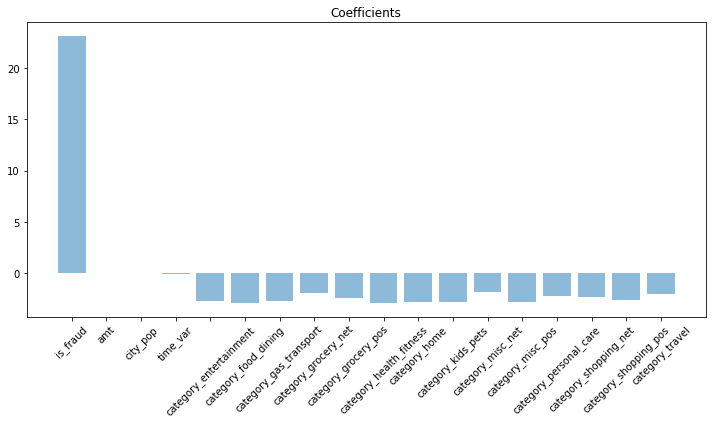

In [31]:
objs = list(x_train.columns)
print(objs)
plt.figure(figsize = (10,6))
7
plt.bar(objs, clf.coef_[0], alpha = 0.5)
plt.xticks(rotation=45)
plt.title("Coefficients")
plt.tight_layout()
plt.show()

From the results above, 𝑐𝑎𝑡𝑒𝑔𝑜𝑟𝑦 can be a good predictor but other variables selected perform
poorly so maybe I may not select them.
